
# This notebook has codes for random forest from scikit learn<br>for an assignment for a data science class.





# Part A And Part B

# Note: The file paths used are relative on this computer.
# Full file path names are used to make the program work.


In [2]:


import matplotlib.image as mpimg

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd




file_path = 'C:\\Users\\KennoHead\\Desktop\\Fall 2020\\4661 Assignment 5\\Digit\\Digit\\'

image_names_label_df = pd.read_csv('C:\\Users\\KennoHead\\Desktop\\Fall 2020\\4661 Assignment 5\\label.csv') 

file_names_list = image_names_label_df['name of the file']



# this generates the columns of the feature matrix
# the numerical values are the positions of each of the pixels
list_of_pixel_positions = []

for i in range(1, 65, 1):
    list_of_pixel_positions.append( str(i))

    
image_pixels_df = pd.DataFrame(columns = list_of_pixel_positions)


# this converts each image into an array of 64 pixel values
for row in file_names_list:
    
    current_pixel_array = []
    
    current_image = mpimg.imread(file_path + str(row)+ '.jpg')
    
    current_pixel_np_array = np.asarray(current_image)
    
    for x in current_pixel_np_array:
        for y in x:
            current_pixel_array.append(y)

    image_pixels_df.loc[row] = current_pixel_array


image_pixels_df['digit label'] = image_names_label_df['digit label']
    



# Part C

The feature matrices and the testing vectors.

In [2]:


from sklearn.model_selection import train_test_split


image_pixels_features_columns = list(image_pixels_df.columns)

image_pixels_features_columns.remove('digit label')

image_pixels_features_matrix = image_pixels_df[image_pixels_features_columns]

image_pixels_label_vector = image_pixels_df['digit label']

pixels_features_matrix_Training, pixels_features_matrix_Testing, pixels_label_vector_Training, pixels_label_vector_Testing = train_test_split(image_pixels_features_matrix, image_pixels_label_vector, test_size = 0.1, random_state = 2)      

  


# Part D
The random forest classifier and the accuracy score.

In [3]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

random_forest_classifier = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 2)

random_forest_classifier.fit(pixels_features_matrix_Training, pixels_label_vector_Training )

random_forest_prediction = random_forest_classifier.predict(pixels_features_matrix_Testing)

random_forest_accuracy_score = accuracy_score(pixels_label_vector_Testing,random_forest_prediction )

print(random_forest_accuracy_score)


0.9277777777777778



# Part D results
The accuracy score calculated at this time was 0.9277.


# Part E


In [4]:

# I basically find the indexes of the label vector
# of the images that are missclassified
# by comparing the label testing vector and the predicted labels vector

misclassified_label_indexes = []

random_forest_prediction_index = 0

for label_vector_testing_index in pixels_label_vector_Testing.index:
    if(pixels_label_vector_Testing[label_vector_testing_index] != random_forest_prediction[random_forest_prediction_index]):
        misclassified_label_indexes.append(label_vector_testing_index)
    random_forest_prediction_index+=1
    






The cell below should plot multiple images<br>
the images are the ones that are missclassified<br>
by the random forest classifier above.<br>


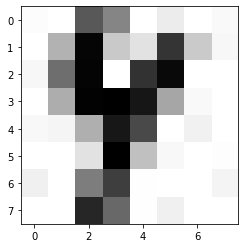

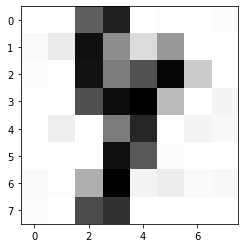

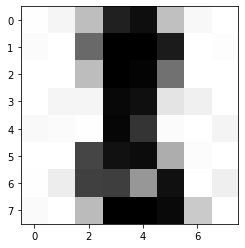

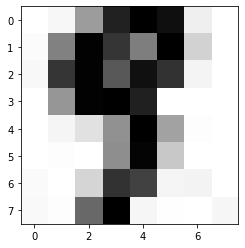

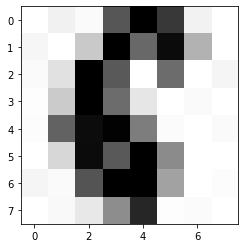

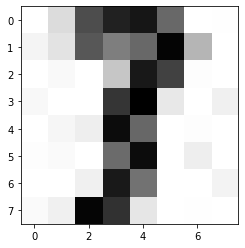

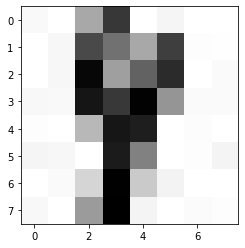

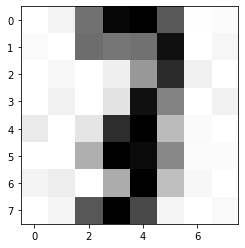

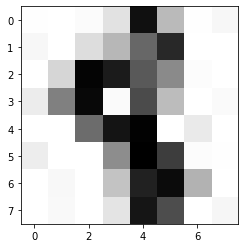

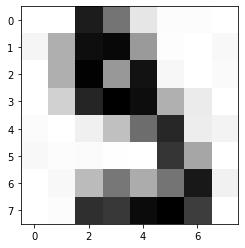

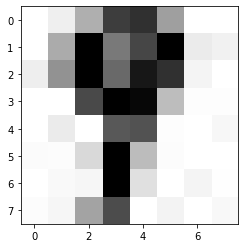

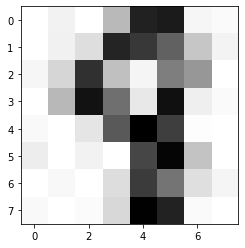

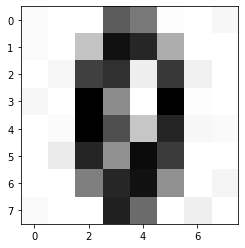

In [5]:


%matplotlib inline



for indexes in misclassified_label_indexes:
    
    current_image_name = str(indexes)
    
    current_image_name = mpimg.imread(file_path + str(indexes)+ '.jpg')

    plt.figure()
    plt.imshow(current_image_name, cmap=plt.cm.gray_r, interpolation='nearest')  

